Importing the Essential Libraries for this Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Next step is to load the data (stored in .csv) from my Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/ENPE 623 Assignment 2 Work Sheet.csv"

In [ ]:
df = pd.read_csv(path)
df.head(16)

,State Name,Play,Nt1,Nt2,Nt3,(MMBOE)
0,Texas,Frio Strain Exploration Play,3,3,3,2000.000
1,Texas,Frio Strain Exploration Play,6,6,6,1000.000
2,Texas,Frio Strain Exploration Play,15,16,16,510.000
3,Texas,Frio Strain Exploration Play,23,23,23,280.000
4,Texas,Frio Strain Exploration Play,40,40,40,120.000
5,Texas,Frio Strain Exploration Play,60,61,62,32.000
6,Texas,Frio Strain Exploration Play,100,105,110,16.000
7,Texas,Frio Strain Exploration Play,115,140,145,8.000
8,Texas,Frio Strain Exploration Play,170,205,215,4.000
9,Texas,Frio Strain Exploration Play,210,275,290,2.000


Function to Calculate the Volume using the VSD model

Firstly, we define our parameters:

$V_i$ = Calculated hydrocarbon volume of a field or petroleum province

$N_t$ = Cumulative number of fields

$N_x$ = Maximum number of fields

$N_m$ = Minimum number of field

$V_x$ = Maximum volume given by a Pareto straight line

$A_p$ = Slope of Pareto distribution

Ψ = Ratio that controls the separation between Pareto and VSD

$V_s$ = Approximate volume at which VSD starts to deviate from Pareto straight line in the right tail

S = Severity exponent

The data presented in the paper are as follows;

$A_p$ = 0.61

$N_m$ = 1

$N_x$ = 315.01

S = 2.3

$V_m$ = 0.032

$V_s$ = 3000

$V_x$ = 50000

Ψ = 0.2

Note: For the range of values of $N_t1$, $N_t2$ and $N_t3$ it is expected that corresponding values of $V_i1$, $V_i2$ and $V_i3$ are calculated

In [ ]:
# Defining the function 

def VSD(Nt, Nm, Nx, Vm, Vx, Vs, Ap, Psi, S):
  a = ((1/Nt - (Vm/Vx)**((np.log(Nx)-np.log(Nm))/(np.log(Vx)-np.log(Vm))))**(1/Ap) + Vm/Vx) * Vx 
  b = a * Psi 
  c = 1 - np.exp(-a/Vs)
  d = Psi + (1 - Psi) * (c)**S 
  V_i = b/d 
  return round(V_i, 2) 

In [ ]:
df['V_i1'] = df['Nt1'].apply(lambda Nt: VSD(Nt, 1, 315.01, 0.032, 50000, 3000, 0.61, 0.2, 2.3))
df['V_i2'] = df['Nt2'].apply(lambda Nt: VSD(Nt, 1, 500.00, 0.032, 50000, 3000, 0.61, 0.2, 2.3))
df['V_i3'] = df['Nt3'].apply(lambda Nt: VSD(Nt, 1, 700.00, 0.032, 50000, 3000, 0.61, 0.2, 2.3))

df 

,State Name,Play,Nt1,Nt2,Nt3,(MMBOE),V_i1,V_i2,V_i3
0,Texas,Frio Strain Exploration Play,3,3,3,2000.000,1841.53,1848.60,1852.05
1,Texas,Frio Strain Exploration Play,6,6,6,1000.000,1210.86,1214.14,1215.72
2,Texas,Frio Strain Exploration Play,15,16,16,510.000,511.86,477.34,483.93
3,Texas,Frio Strain Exploration Play,23,23,23,280.000,255.35,267.29,273.15
4,Texas,Frio Strain Exploration Play,40,40,40,120.000,94.52,102.97,107.18
5,Texas,Frio Strain Exploration Play,60,61,62,32.000,43.03,47.83,49.52
6,Texas,Frio Strain Exploration Play,100,105,110,16.000,14.10,16.54,17.04
7,Texas,Frio Strain Exploration Play,115,140,145,8.000,9.97,8.88,9.82
8,Texas,Frio Strain Exploration Play,170,205,215,4.000,3.12,3.45,4.14
9,Texas,Frio Strain Exploration Play,210,275,290,2.000,1.32,1.39,1.94


Now that the table has been presented, let's go ahead and create the plots

First, we create a plot when $N_x$ = 315.01

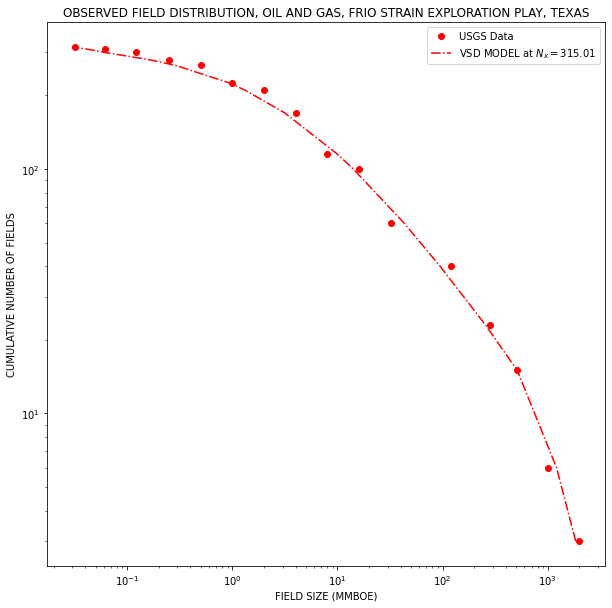

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df['(MMBOE)'], df['Nt1'], 'ro', label='USGS Data')
plt.plot(df['V_i1'], df['Nt1'], 'r-.', label='VSD MODEL at $N_x = 315.01$')
plt.xscale('log')
plt.yscale('log')
plt.title('OBSERVED FIELD DISTRIBUTION, OIL AND GAS, FRIO STRAIN EXPLORATION PLAY, TEXAS')
plt.legend(loc='upper right')
plt.xlabel('FIELD SIZE (MMBOE)')
plt.ylabel('CUMULATIVE NUMBER OF FIELDS')
plt.show()

Next, we add the plot at $N_x$ = 500

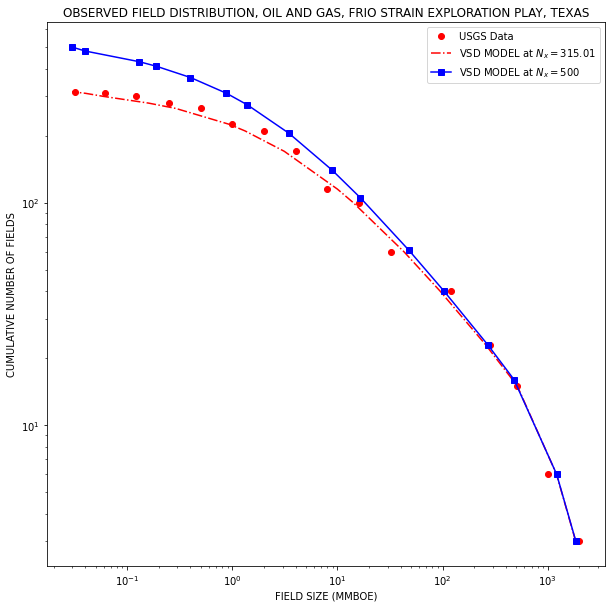

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df['(MMBOE)'], df['Nt1'], 'ro', label='USGS Data')
plt.plot(df['V_i1'], df['Nt1'], 'r-.', label='VSD MODEL at $N_x = 315.01$')
plt.plot(df['V_i2'], df['Nt2'], 'b-s', label='VSD MODEL at $N_x = 500$')
plt.xscale('log')
plt.yscale('log')
plt.title('OBSERVED FIELD DISTRIBUTION, OIL AND GAS, FRIO STRAIN EXPLORATION PLAY, TEXAS')
plt.legend(loc='upper right')
plt.xlabel('FIELD SIZE (MMBOE)')
plt.ylabel('CUMULATIVE NUMBER OF FIELDS')
plt.show()

Finally, we add the plot at $N_x$ = 700

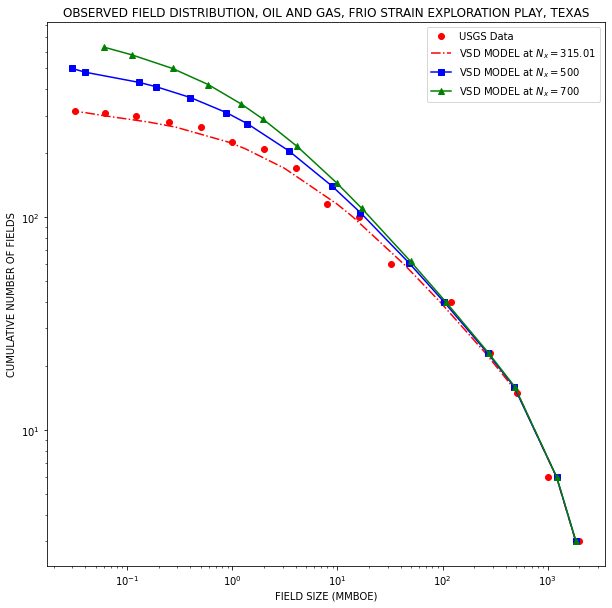

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df['(MMBOE)'], df['Nt1'], 'ro', label='USGS Data')
plt.plot(df['V_i1'], df['Nt1'], 'r-.', label='VSD MODEL at $N_x = 315.01$')
plt.plot(df['V_i2'], df['Nt2'], 'b-s', label='VSD MODEL at $N_x = 500$')
plt.plot(df['V_i3'], df['Nt3'], 'g-^', label='VSD MODEL at $N_x = 700$')
plt.xscale('log')
plt.yscale('log')
plt.title('OBSERVED FIELD DISTRIBUTION, OIL AND GAS, FRIO STRAIN EXPLORATION PLAY, TEXAS')
plt.legend(loc='upper right')
plt.xlabel('FIELD SIZE (MMBOE)')
plt.ylabel('CUMULATIVE NUMBER OF FIELDS')
plt.show()